In [ ]:
%%capture
!add-apt-repository ppa:ubuntugis/ubuntugis-unstable -y
!apt-get update
!apt-get install python-numpy gdal-bin libgdal-dev python3-rtree
!pip install affine
!pip install albumentations==0.4.3
!pip install fiona
!pip install gdal==3.0.3
!pip install geopandas==0.8.0
!pip install matplotlib
!pip install networkx
!pip install numpy
!pip install opencv-python
!pip install pandas
!pip install pyproj
!pip install torch
!pip install pyyaml
!pip install rasterio
!pip install requests
!pip install rtree
!pip install scikit-image
!pip install scipy
!pip install git+git://github.com/toblerity/shapely.git@master #egg=shapely-1.7.1dev
!pip install torchvision
!pip install tqdm
!pip install urllib3
!pip install tensorflow
!pip install solaris


In [ ]:
from solaris.data import data_dir
import solaris as sol
import os
import skimage
import geopandas as gpd
from matplotlib import pyplot as plt
from shapely.ops import cascaded_union
import cv2
import rasterio as rio
import pycocotools.mask as mask_util
import shapely
import math
import numpy as np
import json
from shapely.geometry import Polygon, Point
from osgeo import gdal
import csv
import pandas as pd
import rasterio.mask
import fiona
from PIL import Image, ImageEnhance


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [ ]:
lat_ = 36.2061724 
long_ = -115.3049826
from shapely.geometry import Point
point = Point(lat_, long_)
tile_img = rio.open('/content/SN2_buildings_train_AOI_2_Vegas_PS-RGB_img101.tif')

rows, cols = rio.transform.rowcol(tile_img.transform, lat_, long_)
tile_img.crs
        

CRS.from_epsg(4326)

In [ ]:
gdf = gpd.GeoSeries(point)
print(point)

POINT (36.2061724 -115.3049826)


In [ ]:
gdf.set_crs('EPSG:4326')
row, col = rio.transform.rowcol(tile_img.transform, -115.3049826, 36.2061724)

In [ ]:
p1 = row-75
p2 = row+75
p3 = col-75
p4 = col+75

In [ ]:
image = cv2.imread('/content/SN2_buildings_train_AOI_2_Vegas_PS-RGB_img101.png')
image.shape

(650, 650, 3)

In [ ]:
p1, p2, p3, p4

(332, 482, 213, 363)

In [ ]:
im = image[p1:p2, p3:p4, :]


In [ ]:
im.shape

(150, 150, 3)

In [ ]:

img = Image.fromarray(im)
enhancer = ImageEnhance.Brightness(img)
factor = 1.5 #gives original image
im_output = enhancer.enhance(factor)

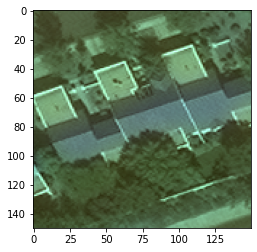

In [ ]:
plt.imshow(im_output)

In [ ]:
# save a image using extension 
im_output.save("building.jpg") 